# Examples of Python string construction and execution

## Can be a very useful trick, or even a good habit (safe plot labeling!)

    1. Build URLs for repetitive Web work
    2. eval(codestring) and exec(codestring) **safe plot titling!**
    3. system command string execution
    4. Markdown display of constructed formatted material

# Example 1. URL construction

## Example 1a: Construct a code-containing URL that does an analysis

by feeding it to a web service that takes long URLs as "code": [this PSD WRIT facility](https://psl.noaa.gov/data/atmoswrit/corr/)

Here is a URL that makes a result:

https://psl.noaa.gov/cgi-bin/data/atmoswrit/corr.proc.pl?dataset1=ERA5&tseries=NAO%3A+North+Atlantic+Oscillation+%28CRU%29+1821-present&userfile=&usertitle=&var=SST%2FSkin+T&level=1000mb&iyr1=&iyr2=&fmonth=11&fmonth2=3&leads=0&lags=0&corr=0&detrend=0&map=0&mapt=0&lat_sat=&lon_sat=&proj=All&xlat1=-90&xlat2=90&xlon1=0&xlon2=360&bottom_lon=0&custproj=Cylindrical+Equidistant&level1=1000mb&level2=100mb&colortable=default&labelc=0&contourtype=Shaded+w%2Foverlying+contours&scale=100&labelcon=1&switch=0&gridfill=0&cint=&low1=&high1=&Submit=Create+Plot

In [6]:
# After studying the URL, find its key inputs. 
# Edit thoe key parts of that URL, for example here replacing only the data product name

URLpart1 = 'https://psl.noaa.gov/cgi-bin/data/atmoswrit/corr.proc.pl?dataset1='
oldname = 'ERA5'
URLpart2 = '&tseries=NAO%3A+North+Atlantic+Oscillation+%28CRU%29+1821-present&userfile=&usertitle=&var=SST%2FSkin+T&level=1000mb&iyr1=&iyr2=&fmonth=11&fmonth2=3&leads=0&lags=0&corr=0&detrend=0&map=0&mapt=0&lat_sat=&lon_sat=&proj=All&xlat1=-90&xlat2=90&xlon1=0&xlon2=360&bottom_lon=0&custproj=Cylindrical+Equidistant&level1=1000mb&level2=100mb&colortable=default&labelc=0&contourtype=Shaded+w%2Foverlying+contours&scale=100&labelcon=1&switch=0&gridfill=0&cint=&low1=&high1=&Submit=Create+Plot'

reanalnames = ['JRA-55','MERRA']
for reanal in reanalnames: 
    URL = URLpart1+reanal+URLpart2
    print(reanal, 'CLICK:    ',URL) 

JRA-55 CLICK:     https://psl.noaa.gov/cgi-bin/data/atmoswrit/corr.proc.pl?dataset1=JRA-55&tseries=NAO%3A+North+Atlantic+Oscillation+%28CRU%29+1821-present&userfile=&usertitle=&var=SST%2FSkin+T&level=1000mb&iyr1=&iyr2=&fmonth=11&fmonth2=3&leads=0&lags=0&corr=0&detrend=0&map=0&mapt=0&lat_sat=&lon_sat=&proj=All&xlat1=-90&xlat2=90&xlon1=0&xlon2=360&bottom_lon=0&custproj=Cylindrical+Equidistant&level1=1000mb&level2=100mb&colortable=default&labelc=0&contourtype=Shaded+w%2Foverlying+contours&scale=100&labelcon=1&switch=0&gridfill=0&cint=&low1=&high1=&Submit=Create+Plot
MERRA CLICK:     https://psl.noaa.gov/cgi-bin/data/atmoswrit/corr.proc.pl?dataset1=MERRA&tseries=NAO%3A+North+Atlantic+Oscillation+%28CRU%29+1821-present&userfile=&usertitle=&var=SST%2FSkin+T&level=1000mb&iyr1=&iyr2=&fmonth=11&fmonth2=3&leads=0&lags=0&corr=0&detrend=0&map=0&mapt=0&lat_sat=&lon_sat=&proj=All&xlat1=-90&xlat2=90&xlon1=0&xlon2=360&bottom_lon=0&custproj=Cylindrical+Equidistant&level1=1000mb&level2=100mb&colortable=

# Example 1b: change time or spatial box of satellite imagery browser

Example URL: it can be much longer, with more overlay fields, custom color bars, etc. 
Create the view you want on this incredible interactive imagery browse service, then capture its URL:

https://worldview.earthdata.nasa.gov/?v=-94.50515992869263,20.02845381519895,-48.06226752265279,42.814497901912254&t=2018-03-29-T19%3A55%3A05Z

In [8]:
# CHOP UP THE STRING and replace the part you want to (like year)

part1 = 'https://worldview.earthdata.nasa.gov/?v=-94.50515992869263,20.02845381519895,-48.06226752265279,42.814497901912254&t='
year = '2018'
day = '-03-29'
part2 = '-T19%3A55%3A05Z'

years = ['2012','2013','2014']
for yyyy in years: 
    print(part1 + yyyy + day + part2)
    
# Result below: clickable links! At least within jupyter. 
# Are they clickable on github or nbviewer static renderings? 
# If not, may need another trick, like #4 below.  

https://worldview.earthdata.nasa.gov/?v=-94.50515992869263,20.02845381519895,-48.06226752265279,42.814497901912254&t=2012-03-29-T19%3A55%3A05Z
https://worldview.earthdata.nasa.gov/?v=-94.50515992869263,20.02845381519895,-48.06226752265279,42.814497901912254&t=2013-03-29-T19%3A55%3A05Z
https://worldview.earthdata.nasa.gov/?v=-94.50515992869263,20.02845381519895,-48.06226752265279,42.814497901912254&t=2014-03-29-T19%3A55%3A05Z


# Example 2a. Python eval() of constructed code string

## The Python is executed -- and you have the identical string for your plot title!
### Very safe -- may save you terrible future science embarrassments from mislabeled plots. 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'data**3 - 1.5*data')

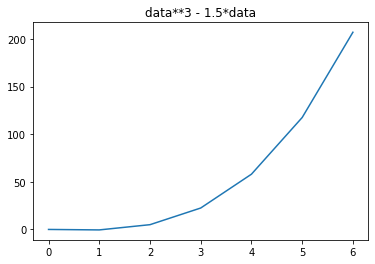

In [9]:
# https://stackoverflow.com/questions/701802/how-do-i-execute-a-string-containing-python-code-in-python

# %pylab is called an ipython "magic". It is deprecated, but useful for quickie analysis.....

%pylab inline 
data = np.array( [0,1,2,3,4,5,6] )

# a string (for filenames or plot titles) is also the actual code to make it happen: safe plotting!
derived = 'data**3 - 1.5*data'

plot( eval(derived) )
plt.title(derived)

# Example 2b. Python exec() is like eval(), but does not return anything

In [10]:
doit = "print(4)" 
exec(doit)

4


In [11]:
printit = "2*2"
print( eval(printit) )

4


# Example 3: System execution of a command string

https://stackoverflow.com/questions/4760215/running-shell-command-and-capturing-the-output

In [66]:
# This is the quick way to execute a command in the shell environment 
# common use case:   !pip install package  makes your notebook executable 
# in a non-prepared environment (like on Colab) 
!ls -s

total 584
  0 AmericanMetSoc_AI-ML_trainings       32 Pythia_quickstart.ipynb
152 Brian_India_Soundings.ipynb           8 README.md
 56 Executable_strings_tricks.ipynb      16 ShuffleStudentAssignments.ipynb
176 Jupyter Notebook Users Manual.ipynb 144 TornadosClosestToRadars.ipynb


In [80]:
# The os module works identically in Linux, PC, etc. 
# https://docs.python.org/3/library/os.html?highlight=os#module-os

import os
files = os.listdir() # returns the result as a list of strings, I notice 
files

['ShuffleStudentAssignments.ipynb',
 'Jupyter Notebook Users Manual.ipynb',
 'Brian_India_Soundings.ipynb',
 'TornadosClosestToRadars.ipynb',
 'README.md',
 'Executable_strings_tricks.ipynb',
 'AmericanMetSoc_AI-ML_trainings',
 '.ipynb_checkpoints',
 'Pythia_quickstart.ipynb']

In [71]:
#https://docs.python.org/3/library/subprocess.html#module-subprocess

import subprocess
subprocess.run("ls")

CompletedProcess(args='ls', returncode=0)

AmericanMetSoc_AI-ML_trainings
Brian_India_Soundings.ipynb
Executable_strings_tricks.ipynb
Jupyter Notebook Users Manual.ipynb
Pythia_quickstart.ipynb
README.md
ShuffleStudentAssignments.ipynb
TornadosClosestToRadars.ipynb


# Example 4: Build some markdown string, and execute it

In [5]:
from IPython.display import display, Markdown

my_formatted_text = '# Equation: $\omega = 0$'
display(Markdown(my_formatted_text))

# Equation: $\omega = 0$